In [1]:
pip install deepxde

In [2]:
# load libraries
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import math as m

g = tf.constant(9.8)

def ode_system(t, u):
    du_t = dde.grad.jacobian(u, t)
    return du_t - g + u**2

def boundary(t, on_initial):
    return on_initial and np.isclose(t[0], 0)

geom = dde.geometry.TimeDomain(0, 1)

ic = dde.IC(geom, lambda t: 0, boundary)

# Reference solution to compute the error
def true_solution(t):
  return 3.1305*np.tanh(3.1305*t)
  # return np.log(np.cosh(3.1305*t))


data = dde.data.PDE(geom,
                    ode_system,
                    ic,
                    num_domain = 30,
                    num_boundary = 2,
                    solution = true_solution,
                    num_test = 100)

layer_size = [1] + [32] + [1]
activation = "tanh"
initializer = "Glorot uniform"

NN = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, NN)
model.compile("adam", lr = 0.001)

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Compiling model...
Building feed-forward neural network...
'build' took 0.058020 s

'compile' took 0.552048 s



Training model...

Step      Train loss              Test loss               Test metric
0         [5.54e+01, 0.00e+00]    [5.49e+01, 0.00e+00]    []  
1000      [1.33e+00, 6.44e+00]    [1.23e+00, 6.44e+00]    []  
2000      [1.14e+00, 5.18e+00]    [1.00e+00, 5.18e+00]    []  
3000      [9.78e-01, 2.75e-01]    [8.41e-01, 2.75e-01]    []  
4000      [3.68e-02, 1.00e-04]    [3.67e-02, 1.00e-04]    []  
5000      [5.86e-03, 4.95e-05]    [4.37e-03, 4.95e-05]    []  
6000      [5.23e-03, 7.26e-05]    [3.50e-03, 7.26e-05]    []  

Best model at step 6000:
  train loss: 5.31e-03
  test loss: 3.57e-03
  test metric: []

'train' took 8.576613 s



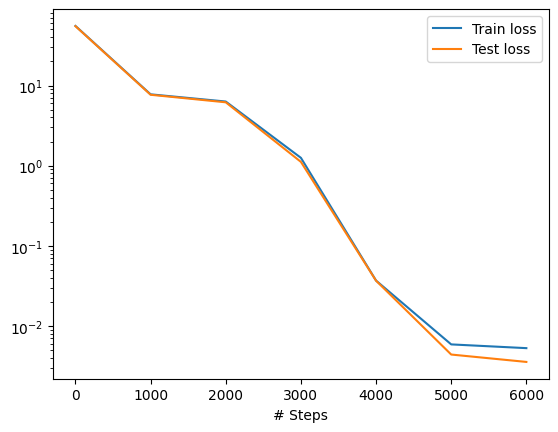

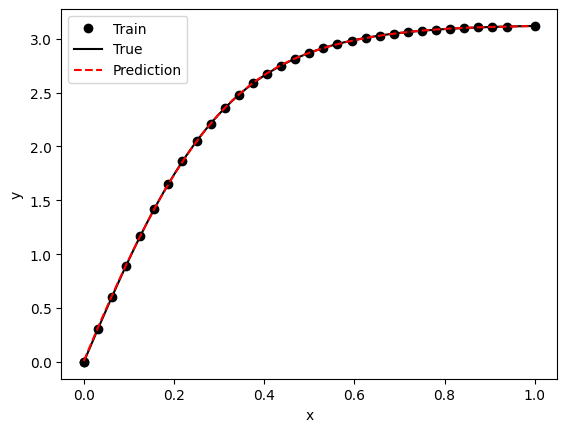

In [3]:
losshistory, train_state = model.train(epochs = 6000)
dde.saveplot(losshistory, train_state, issave = False, isplot = True)